# Probability theory figures generation

This notebook contains all the figure generation code for [Section 2.1 Probability theory]() in the **No Bullshit Guide to Statistics**.

#### Notebook setup

We'll start by importing the Python modules we'll need for this notebook.

In [1]:
# load Python modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,4)},
)

# %config InlineBackend.figure_format = 'retina'

In [3]:
# set random seed for repeatability
np.random.seed(3)

## Definitions

#### Example 1: Uniform distribution

The [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) $\mathcal{U}(0,1)$ is described by the following probability density function:
$$
  p_U(u) =
  \begin{cases}
      1 & \mathrm{for}\ 0 \le u \le 1, \\
      0 & \mathrm{for}\ u<0\ \mathrm{or}\ u>1.
  \end{cases}
$$
where $U$ is the name of the random variable and $u$ are particular values it can take on.

The above equation describes tells you how likely it is to observe $\{U=u\}$.
For a uniform distribution $\mathcal{U}(0,1)$, each $u$ between 0 and 1 is equally likely to occur,
and values of $u$ outside this range have zero probability of occurring.

In [4]:
from plot_helpers import plot_pdf_and_cdf

(<Figure size 504x288 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Probability density function'}>,
        <AxesSubplot:title={'center':'Cumulative distribution function'}>],
       dtype=object))

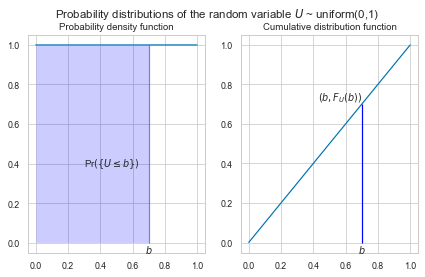

In [5]:
from scipy.stats import uniform
rvU = uniform(0, 1)
plot_pdf_and_cdf(rvU, 0.7, rv_name="U")

In [95]:
filename = "figures/uniform_pdf_and_CDF_until_b.pdf"

with plt.rc_context({"figure.figsize":(10,5)}):
    fig, axs = plot_pdf_and_cdf(rvU, 0.7, rv_name="U")
    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

**Computer simulation**

We'll introduce computer models for random variables is [Section 2.1.5 — Computer models for random variables](#computer_models) below, but since we're looking at a notebook, we can show a little preview of the calculations you'll learn by the end of the section.

In [4]:
# define the computer model `rvU` for the random variable U
from scipy.stats import uniform
rvU = uniform(0, 1)

# use `quad` function to integrate rvU.pdf between 0.2 and 0.5
from scipy.integrate import quad
quad(rvU.pdf, 0.2, 0.5)[0]

0.3

#### Example 2: Normal distribution

A random variable $N$ with a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) 
$\mathcal{N}(\mu,\sigma)$ is described by the probability density function:
$$ \Large
    f_N(n) = \tfrac{1}{\sigma\sqrt{2\pi}} e^{\small -\tfrac{(n-\mu)^2}{2\sigma^2}}.
$$

The mean $\mu$ (the Greek letter *mu*) and the standard deviation $\sigma$ (the Greek letter *sigma*) are called the parameters of the distribution.

The math notation $\mathcal{N}(\mu, \sigma)$ is used to describe the whole family of normal probability distributions,
and $N \sim \mathcal{N}(1000, 100)$ is a particular instance of the distribution with mean $\mu = 1000$ and standard deviation $\sigma = 100$.

(<Figure size 504x288 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Probability density function'}>,
        <AxesSubplot:title={'center':'Cumulative distribution function'}>],
       dtype=object))

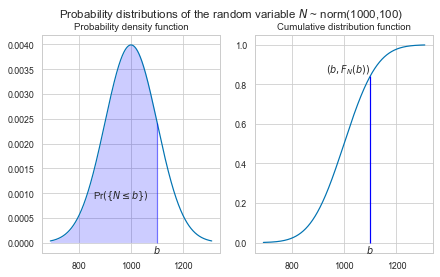

In [96]:
from scipy.stats import norm
mean = 1000
std = 100
rvN = norm(mean, std)

plot_pdf_and_cdf(rvN, 1100, rv_name="N")

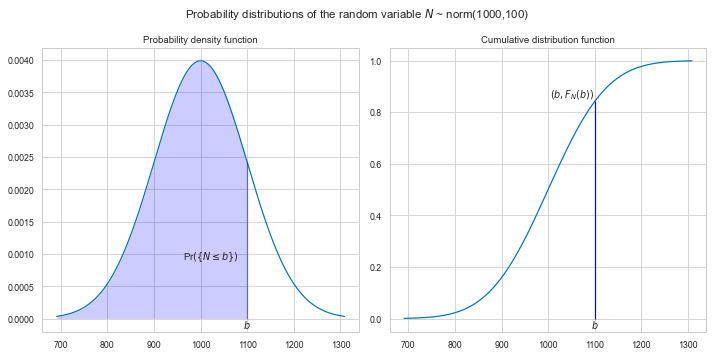

In [6]:
filename = "figures/normal_pdf_and_CDF_until_b.pdf"

from scipy.stats import norm
mean = 1000
std = 100
rvN = norm(mean, std)

with plt.rc_context({"figure.figsize":(10,5)}):
    fig, axs = plot_pdf_and_cdf(rvN, 1100, rv_name="N")
    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

The code example below shows the calculation of the probability $\Pr\!\left( \{ 800 \leq N \leq 900 \} \right)$,
which corresponds to the integral $\int_{n=800}^{n=900} f_N(n) dn$.

In [5]:
# define the computer model `rvN` for the random variable N
from scipy.stats import norm
rvN = norm(1000, 100)

# use `quad` function to integrate rvN.pdf between 800 and 900
quad(rvN.pdf, 800, 900)[0]

0.13590512198327784

#### Example 3: Coin flip

Consider the random variable $C$ that describes the outcome of a coin flip for a balanced (fair) coin.
The sample space for the random variable $C$ is $\{\texttt{heads}, \texttt{tails}\}$.

The probability mass function is
$$
    f_C(\texttt{heads}) = 0.5
    \quad
    \textrm{and}
    \quad
    f_C(\texttt{tails}) = 0.5.
$$

In [6]:
# define the computer model `rvC` for the random variable C
from scipy.stats import randint
rvC = randint(0, 2)

# print the values of the probability mass function
for c in range(0,2):
    print(c, rvC.pmf(c))

0 0.5
1 0.5


#### Example 4: Rolling a six-sided die

The random outcome that occurs when we roll a six-sided die can be described as a random variable $D$
which has the sample space $\{1, 2, 3, 4, 5, 6\}$.
If we assume the die is fair,
then each of the outcomes will have equal weight,
so the probability mass function $f_D$ has the following values:

$$
    f_D(1)\!=\!\tfrac{1}{6},
    \ 
    f_D(2)\!=\!\tfrac{1}{6},
    \ 
    f_D(3)\!=\!\tfrac{1}{6},
    \ 
    f_D(4)\!=\!\tfrac{1}{6},
    \ 
    f_D(5)\!=\!\tfrac{1}{6},
    \ 
    f_D(6)\!=\!\tfrac{1}{6}.
$$

In [7]:
# define the computer model `rvD` for the random variable D
rvD = randint(1, 7)

# print the values of probability mass function
for d in range(1,7):
    print(d, rvD.pmf(d))

1 0.16666666666666666
2 0.16666666666666666
3 0.16666666666666666
4 0.16666666666666666
5 0.16666666666666666
6 0.16666666666666666


## Calculus prerequisites

(see formulas and definitions in the book)

### Sets


In [8]:
S = {1, 2, 3}
T = {3, 4, 5, 6}

print("S ∪ T =", S.union(T))
print("S ∩ T =", S.intersection(T))
print("S \ T =", S.difference(T))

S ∪ T = {1, 2, 3, 4, 5, 6}
S ∩ T = {3}
S \ T = {1, 2}


### Functions

In Python, we define functions using the `def` keyword.

For example, the code cell below defines the function $g(x)=x$,
then evaluate it for the input $x=4$.

In [9]:
# define the function g that takes input x
def g(x):
    return x

# calling the function g on input x=4
g(4)

4

#### Plotting the graph of the function $g(x)$

The graph of the function $g(x)$ is obtained by plotting a line that passes through the set of input-output coordinate pairs $(x, g(x))$.

<AxesSubplot:>

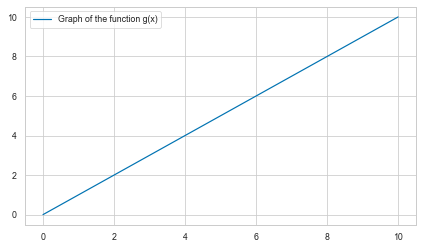

In [10]:
import numpy as np
import seaborn as sns

xs = np.linspace(0, 10, 100)
gxs = g(xs)

sns.lineplot(x=xs, y=gxs, label="Graph of the function g(x)")

The function `linspace(0,10,100)` creates an array of `100` points in the interval $[0,10]$.
We store this sequence of inputs into the variable `xs`.
Next, we computer the output value $y = g(x)$ for each of the inputs in the array `xs`,
and store the result in the array `gxs`.
Finally, we use the function `sns.lineplot()` to generate the plot.

In [11]:
# import matplotlib.pyplot as plt
# filename = "figures/graph_of_function_g_eq_x.pdf"

# with plt.rc_context({"figure.figsize":(4,4)}):
#     ax = sns.lineplot(x=xs, y=ys, label="Graph of the function g(x)")
#     ax.figure.tight_layout()
#     ax.set_xlabel('x')
#     ax.set_ylabel('g(x)')
#     ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

In [12]:
import numpy as np

np.sqrt(4)

2.0

In [13]:
np.log(4)

1.3862943611198906

Examples of function-followed-by-inverse-function calculations:

In [14]:
np.sqrt(4)**2

4.0

In [15]:
np.exp(np.log(4))

4.0

### Computing integrals geometrically


See Figure 2.15 in the book that shows the integral under $f(x) = 3$ between $a=0$ and $b=5$.



See also Figure 2.16 that shows the integral under $g(x) = x$ between $a=0$ and $b=5$.


### Computing integrals numerically using SciPy `integrate` methods

There are numerous ways to compute integrals in Python. 
Computing integrals "numerically" means we're splitting the region of integration into thousands or millions of sub-regions, computing the areas of these sub-regions, and adding up the result.

We'll now show some examples using two of the functions form the module `sympy.integrate`:
- `quad(f,a,b)`: high-level function for computing areas (quadratures)
- `trapz(ys,xs)`: low-level function for computing integral using trapezoid approximation



We'll start with the `quad` function.

In [16]:
from scipy.integrate import quad

In [17]:
# define the constant function f(x) = c
def f(x):
    c = 3
    return c

# call the funtion f with input x=333
f(333)

3

In [18]:
quad(f, 0, 5)

(15.0, 1.6653345369377348e-13)

The function `quad` returns two numbers as output: the value of the integral and a precision parameter.
In output of the code, tells us the value of the integral is $\int_0^5 3 dx$ is `15.0` and guarantees the accuracy of this value up to an error of $10^{-13}$.

Since we're usually only interested in the value of the integral, we often select the first output of `quad` so you'll see the code like `quad(...)[0]` in all the code examples below.

In [19]:
quad(f, 0, 5)[0]

15.0

In [20]:
# define the function g(x) = x (line with slope 1)
def g(x):
    return x

# call the funtion g with input x=10
g(10)

10

In [21]:
quad(g, 0, 5)[0]

12.5

#### Trapezoid approximation

Let's now use another approach based on the trapezoid approximation.

We must build array of inputs $x$ and outputs $g(x)$ of the function,
then pass it to `trapz` so it carries out the calculation.

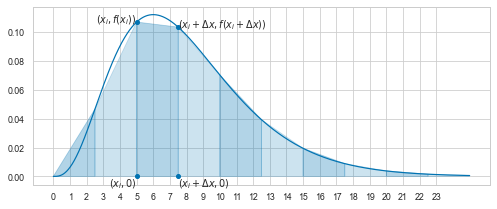

In [100]:
filename = "figures/plot_of_trapezoid_under_chi2_df_eq_8.pdf"

import matplotlib.pyplot as plt
from scipy.stats import chi2

n = 10

X2 = chi2(df=8)
f = X2.pdf

a = 0
b = 25


with plt.rc_context({"figure.figsize":(7,3)}):

    # x and y values for the trapezoid rule
    xs = np.linspace(a, b, n+1)
    ys = f(xs)

    # X and Y values for plotting y=f(x)
    X = np.linspace(a, b, 10000)
    Y = f(X)
    plt.plot(X,Y)
    plt.xticks(range(0,b-1))
    ax = plt.gca()
    # ax.set_title('Approximation to the area under $f(x)$ using n = {} trapezoids.'.format(n), y=0, pad=-30)


    for i in range(n):
        xcoords = [xs[i], xs[i],    xs[i+1],    xs[i+1] ]
        ycoords = [0,     f(xs[i]), f(xs[i+1]), 0      ]
        alpha = 0.2 if i%2==1 else 0.3
        plt.fill(xcoords, ycoords, 'b', edgecolor='b', alpha=alpha)
        if i == 2:
            plt.plot(xs[i],   0,          marker="o", markersize=4, markeredgecolor="b", markerfacecolor="b")
            plt.text(xs[i],   0,          '$(x_i, 0)$', ha='right', va='top')
            plt.plot(xs[i],   f(xs[i]),    marker="o", markersize=4, markeredgecolor="b", markerfacecolor="b")
            plt.text(xs[i],   f(xs[i]),    '$(x_i, f(x_i))$', ha='right')
            plt.plot(xs[i+1], 0,          marker="o", markersize=4, markeredgecolor="b", markerfacecolor="b")
            plt.text(xs[i+1], 0,          '$(x_i+\Delta x, 0)$', ha='left', va='top')
            plt.plot(xs[i+1], f(xs[i+1]),  marker="o", markersize=4, markeredgecolor="b", markerfacecolor="b")
            plt.text(xs[i+1], f(xs[i+1]), '$(x_i+\Delta x, f(x_i+\Delta x))$')


    ax.figure.tight_layout()
    ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)


In [22]:
from scipy.integrate import trapz

In [23]:
m = 1000
xs = np.linspace(0, 5, m)
gxs = g(xs)

trapz(gxs, xs)

12.5

### Computing integrals symbolically using SymPy `integrate`

In [117]:
from sympy import symbols

# define symbolic variables
x, a, b, c = symbols('x a b c')

The `symbols` function creates SymPy symbolic variables.
Unlike ordinary Python variables that hold a particular value,
SymPy variables act as placeholders that can take on any value.

We can use the symbolic variables to create expressions,
just like we do with math variables in pen-and-paper calculations.

#### Constant function $f(x)=c$

In [25]:
fx = c
fx

c

We'll use the SymPy function `integrate` for computing integrals.
We call this function
by passing in the expression we want to integrate as the first argument.
The second argument is a triple $(x,a,b)$,
which specifies the variable of integration $x$,
the lower limit of integration $a$,
and the upper limit of integration $b$.

In [116]:
from sympy import integrate

integrate(fx, (x,a,b))  # = A_f(a,b)

25*c

The answer $c\cdot (b-a)$ is the general expression for calculating the area under $f(x)=c$,
for between any starting point $x=a$ and end point $x=b$.
Geometrically, this is just a height-times-width formula for the area of a rectangle.

To compute the specific integral between $a=0$ and $b=5$ under $f(x)=3$,
we use the `subs` (substitute) method,
passing in a Python dictionary of the values we want to "plug" into the general expression.

In [27]:
integrate(fx, (x,a,b)).subs({c:3, a:0, b:5})

15

The integral function $F_0(b) = \int_0^b f(x) dx$ is obtained as follows.

In [28]:
integrate(fx, (x,0,b))  # = F_0(b)

b*c

#### Line $g(x)=x$

In [29]:
gx = 1*x
gx

x

In [30]:
integrate(gx, (x,a,b))  # = A_g(a,b)

-a**2/2 + b**2/2

In [118]:
integrate(gx, (x,a,b))

-a**2/2 + b**2/2

In [32]:
integrate(gx, (x,a,b)).subs({a:0, b:5})

25/2

In [33]:
integrate(gx, (x,a,b)).subs({m:3, a:0, b:5}).evalf()

12.5000000000000

Bonus: the integral function $G_0(b) = \int_0^b g(x) dx$ is obtained as follows.

In [34]:
integrate(gx, (x,0,b))  # = G_0(b)

b**2/2

## Calculations with random variables

### Example 1: mean and variance of the uniform distribution


#### Mean
\begin{align*}
    \mu_U = \mathbb{E}_U[U] 
        &=	\int_{-\infty}^{\infty}	u f_U(u) \; du		\\
        &=	\int_0^1 u f_U(u) \; du				\\
        &=	\int_0^1 u \cdot 1 \; du	= 	\tfrac{1}{2}.
\end{align*}

In [35]:
from sympy import symbols, integrate

u = symbols('u')
integrate(u * 1, (u,0,1))

1/2

So the mean is $\mu_U = \frac{1}{2} = 0.5$.

#### Variance

The formula for the variance is
$$
    \sigma_U^2
        = \mathbb{E}_U\!\left[ (U-\mu_U)^2 \right]
        = \int_0^1 (u- \tfrac{1}{2})^2 \cdot f_U(u) \; du.
$$

In [36]:
from sympy import symbols, integrate

u = symbols('u')
integrate( (u-1/2)**2 * 1, (u,0,1) )

0.0833333333333333

So the variance of $U$ is $\sigma_U^2 = \frac{1}{12} = 0.08\overline{3}$.

We can compute the standard deviation $\sigma_U$ by taking the square root of the variance.

In [37]:
import numpy as np
np.sqrt(0.0833333333333333)

0.2886751345948128

### Example 2: mean and variance of a normal distribution

$$
    p_N(n)
      = \tfrac{1}{\sigma\sqrt{2\pi}} e^{-\tfrac{(n-\mu)^2}{2\sigma^2}}
      = \tfrac{1}{100\sqrt{2\pi}} e^{-\tfrac{(n-1000)^2}{2\cdot100^2}}.
$$

In [38]:
import numpy as np

mu = 1000
sigma = 100

def fN(n):
    z = (n - mu)/sigma
    C = sigma * np.sqrt(2*np.pi)
    return 1 / C * np.exp(-1/2 * z**2)

The mean of $N$ is

In [39]:
from scipy.integrate import quad

def n_times_fN(n):
    return n * fN(n)

muN = quad(n_times_fN, -2000, 4000)[0]
muN

1000.0

The standard deviation of $N$ is

In [40]:
def n_minus_mu_sq_times_fN(n):
    return (n-muN)**2 * fN(n)

sigma_sq = quad(n_minus_mu_sq_times_fN, -2000, 4000)[0]
sigmaN = np.sqrt(sigma_sq)
sigmaN

100.00000000000001

## Probability models

In probability theory, we model data as instances of a **random variable** $X$ described by a **probability distribution** $f_X$ (a math function) with particular parameters (usually denoted with Greek letters like $\theta$, $\mu$, $\sigma$, etc.).

Multiple different ways to specify and interact with probability distributions:
- exact math model function (CDF from which we can extract pdf density function or pmf mass function). Math models allow us the most options: `rvs`, `cdf`, `pdf/pmf`, and stats like `mean`, `median`, `var/std`, `quartiles`.
- random draws form a generative process
- random draws from a real world process
- data for an entire population (census)
- sample data from a population
- synthetic data obtained by resampling
  - bootstrap estimation for any distribution
  - permutation test for no-difference-between-groups hypotheses

<a name="computer_models"></a>

## Computer models for random variables

- `<model>`: the family of probability distributions
- `<params>`: parameters of the model—specific value of the control knobs we choose in the general family of distributions to create a particular distribution
- `<model>(<params>)`: a particular instance of probability model created by choosing a model family `<model>` and the model parameters `<params>`.
  - example 1: uniform family of distribution $\mathcal{U}(\alpha,\beta)$ with parameters $\alpha$ and $\beta$.  
  - example 2: normal family of distribution $\mathcal{N}(\mu,\sigma)$ with parameters $\mu$ and $\sigma$.
- $\sim$: math shorthand symbol that stands for "is distributed according to."
  For example $X \sim \texttt{model}(\theta)$ means the random variable $X$
  is distributed according to model instance $\texttt{model}$ and parameters $\theta$.


In [41]:
from scipy.stats import norm

# create a normal random variable with mean 1000 and std 100
rvN = norm(1000, 100)

In [42]:
type(rvN)

scipy.stats._distn_infrastructure.rv_frozen

In [43]:
## see all attributes and methods:
# [attr for attr in dir(rvN) if "__" not in attr] 

### Plotting the probability functions

<AxesSubplot:>

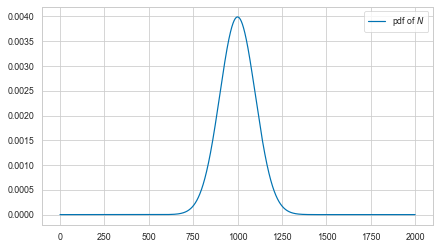

In [44]:
ns = np.linspace(0, 2000, 10000)
fNs = rvN.pdf(ns)
sns.lineplot(x=ns, y=fNs, label="pdf of $N$")

In [45]:
# import matplotlib.pyplot as plt
# filename = "figures/plot_of_pdf_of_rvN.pdf"

# with plt.rc_context({"figure.figsize":(7,3)}):
#     ns = np.linspace(0, 2000, 10000)
#     fNs = rvN.pdf(ns)
#     ax = sns.lineplot(x=ns, y=fNs, label="pdf of $N$")
#     ax.figure.tight_layout()
#     ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

The cumulative distribution is the integral of the probability density function:
$$
   F_N(b) = \textrm{Pr}(N \leq b) = \int_{-\infty}^b f_N(n) \, dn
$$


<AxesSubplot:>

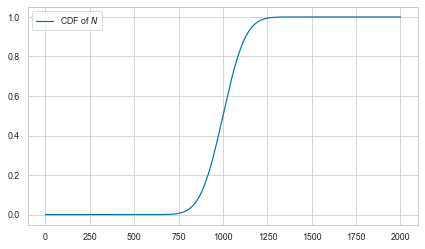

In [46]:
ns = np.linspace(0, 2000, 10000)
FNs = rvN.cdf(ns)
sns.lineplot(x=ns, y=FNs, label="CDF of $N$")

In [47]:
# import matplotlib.pyplot as plt
# filename = "figures/plot_of_CDF_of_rvN.pdf"

# with plt.rc_context({"figure.figsize":(7,3)}):
#     ns = np.linspace(0, 2000, 10000)
#     FNs = rvN.cdf(ns)
#     ax = sns.lineplot(x=ns, y=FNs, label="CDF of $N$")
#     ax.figure.tight_layout()
#     ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

### Properties of the distribution

In [48]:
rvN.mean()

1000.0

In [49]:
rvN.std()

100.0

In [50]:
rvN.var()

10000.0

In [51]:
np.sqrt( rvN.var() )  # = rvN.std()

100.0

In [52]:
rvN.median()

1000.0

In [53]:
rvN.support()

(-inf, inf)

### Computing probabilities

Suppose you want to compute the probability of the outcome $\{ a \leq N \leq b \}$
for the random variable $N$.

In [54]:
# Pr({800 < N < 1200}) = integral of f_N between 800 and 1200
quad(rvN.pdf, 800, 1200)[0]

0.9544997361036417

In [55]:
# Pr({800 < N < 1200}) = F_N(1200) - F_N(800)
rvN.cdf(1200) - rvN.cdf(800)

0.9544997361036416

### Computing quantiles

The inverse question is to find the interval $(-\infty, n_q]$ that contains proportion $q$ of the total probability.

For example the $q=0.25$ quantile is located at

In [56]:
# first quartile
rvN.ppf(0.25)

932.5510249803918

In [57]:
# verify that Pr({N<=932.5510249803918)}) == 0.25
rvN.cdf(932.5510249803918)

0.25

In [58]:
# second quartile == median
rvN.ppf(0.5)

1000.0

In [59]:
# third quartile
rvN.ppf(0.75)

1067.4489750196083

#### Left tail

In [60]:
rvN.ppf(0.05)

835.5146373048527

#### Right tail

In [61]:
rvN.ppf(0.95)

1164.4853626951472

#### Computing confidence intervals

To compute a 90% confidence interval for the random variable $N$,
we can use the `rvN.interval()` method.

In [62]:
rvN.interval(0.90)

(835.5146373048527, 1164.4853626951472)

Note the method `rvN.interval(0.90)` is just a shortcut for computing `(rvN.ppf(0.05),rvN.ppf(0.95))`.

### Generating random observations

Let's say you want to generate $n=10$ observations from the random variable $N$.
You can do this by calling the method `rvN.rvs(n)`.

In [63]:
ns = rvN.rvs(10)
ns

array([1178.86284734, 1043.65098505, 1009.64974681,  813.65072966,
        972.26117975,  964.52410207,  991.72585185,  937.29993232,
        995.6181831 ,  952.27819696])

In [119]:
ns_mean = sum(ns) / len(ns)
ns_mean

1000.0

### Computing expectations

Suppose the distributor accepts only bottles contain between 800 ml and 1200 ml,
and you'll receive a receive payment of $\$2$ for each bottle.
Bottles outside that range get rejected and you don't get paid for them.

In [65]:
def payment(n):
    if 800 <= n and n <= 1200:
        return 2
    else:
        return 0

In [66]:
# get paid if in spec
payment(1050)

2

In [67]:
# don't get paid if out of spec
payment(1250)

0

In [68]:
# expected value of payment
rvN.expect(payment, lb=0, ub=2000)

1.9089994722069916

Visually speaking, only parts of the probability mass of the random variable "count" towards the payment, the subset of the values inside the yellow region shown below.

<AxesSubplot:>

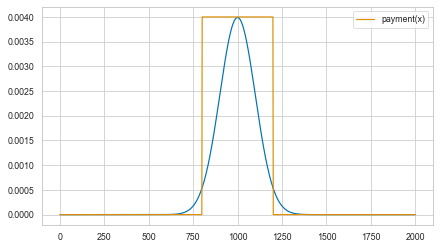

In [125]:
xs = np.linspace(0, 2000, 1000)
ys = [payment(x)/500 for x in xs]

sns.lineplot(x=xs, y=rvN.pdf(xs))
sns.lineplot(x=xs, y=ys, label="payment(x)")

## Discussion

### Theoretical calculus topics




In [70]:
from sympy import symbols

x, a, b, i, m, n = symbols("x a b i m n")
x

x

Let's create a simple expression using the symbols.

In [71]:
expr = b + m*x
expr

b + m*x

Let's look how SymPy represents this expression under the hood.

In [72]:
from sympy import srepr

srepr(expr)

"Add(Symbol('b'), Mul(Symbol('m'), Symbol('x')))"

#### Limits


In [73]:
from sympy import limit, exp, oo

limit(exp(x)/x**100, x, oo) 

oo

In [74]:
# # EXAMPLE 2: ... consider segtment of length (b-a) cut into n parts
# delta = (b - a)/n

# zero length...
# limit(delta, n, oo)

# but still add up to whole interval...
# summation(delta, (i, 0, n-1))

#### Derivatives


The derivative function of $f(x) = mx +b$ is $f'(x)=m$.

In [75]:
from sympy import diff

f = b + m*x

diff(f, x)

m

The derivative function of $f(x) = \frac{c}{2}x^2$ is $f'(x)=cx$.

In [76]:
f = c/2 * x**2

diff(f, x)

c*x

Here is another example of a complicated-looking function,
that includes an exponential, a trigonometric, and a logarithmic function.

In [128]:
from sympy import log, exp, sin
f = exp(x) + sin(x) + log(x)
f

exp(x) + log(x) + sin(x)

In [129]:
diff(f)

exp(x) + cos(x) + 1/x

#### Optimization algorithms

See [wikipedia](https://en.wikipedia.org/wiki/Gradient_descent) for the description of the gradient descent algorithm.

The code below implements a simplified version in one dimension, so we call it derivative descent.

In [79]:
def derivative_descent(f, x0=0, alpha=0.01, tol=1e-11):
    """
    Computes the minimum of SymPy expression `f` using
    the gradient descent algorithm in one dimension.
    """
    x_i = x0
    delta = float("inf")
    while delta > tol:
        # print('current', x_i, delta)
        df_at_x_i = diff(f, x).subs({x:x_i})
        x_next = x_i - alpha*df_at_x_i
        delta = abs(x_next - x_i)
        x_i = x_next
    return x_i

Let's find the minimum value of the function $f(x) = (x-5)^2$ using the `derivative_descent` algorithm.

In [80]:
f = (x-5)**2

argmin_f = derivative_descent(f)
argmin_f

4.99999999951256

The solution is roughly accurate to roughly `tol`*10 = `1e-10`  decimals.

In [81]:
float(argmin_f - 5)

-4.874394221587863e-10

#### Using SciPy optimization functions

Let's solve the same optimization problem using the function `minimize` from `scipy.optimize`.

In [82]:
from scipy.optimize import minimize

def f(x):
    return (x-5)**2

res = minimize(f, x0=0)

res["x"][0]  # = argmin f(x)

4.99999997455944

#### Riemann sums

See this [excerpt](https://minireference.com/static/excerpts/noBSmathphys_v5_preview.pdf#page=114) for a definition of the Riemann sum.

#### Fundamental theorem of calculus


In [83]:
from sympy import diff, integrate, log, exp, sin

f = log(x) + exp(x) + sin(x)

In [84]:
F = integrate(f)
F

x*log(x) - x + exp(x) - cos(x)

In [85]:
diff(F)

exp(x) + log(x) + sin(x)

In [86]:
diff(integrate(f)) == f

True

In [87]:
integrate(diff(f)) == f

True

### Bulk of the normal distribution

How much of the total probability "weight" lies within $k$ standard deviations of the mean?

$$
\textrm{Pr}(\mu_N - k\sigma_N \leq N \leq \mu_N + k\sigma_N) \ = \ p_k.
$$

In [88]:
from scipy.integrate import quad
from scipy.stats import norm
rvN = norm(1000, 100)

In [89]:
mu = rvN.mean()    # mean of the random variable
sigma = rvN.std()  # standard deviaiton of the random variable

for k in [1, 2, 3]:
    I_k = [mu - k*sigma, mu + k*sigma]
    p_k = quad(rvN.pdf, *I_k)[0]
    print(f"p_{k} = Pr( N in {I_k} ) = {p_k:.3f}")

p_1 = Pr( N in [900.0, 1100.0] ) = 0.683
p_2 = Pr( N in [800.0, 1200.0] ) = 0.954
p_3 = Pr( N in [700.0, 1300.0] ) = 0.997


The code below highlights the interval $I_k$ and computes the probability $p_k$.
Change the value of $k$ to get different plots.

n = 1 interval contains 0.6826894921370859
n = 2 interval contains 0.9544997361036417
n = 3 interval contains 0.99730020393674


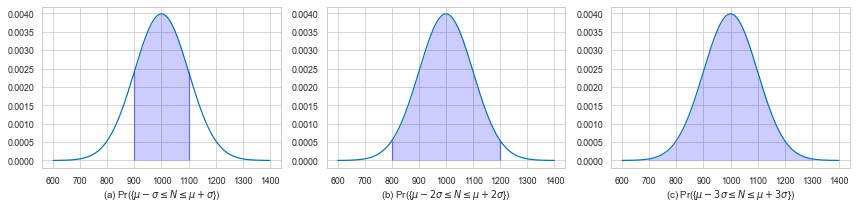

In [98]:
import matplotlib.pyplot as plt
from plot_helpers import calc_prob_and_plot

filename = "figures/bulk_of_the_distribution_panel.pdf"

mu = rvN.mean()    # mean of the random variable
sigma = rvN.std()  # standard deviaiton of the random variable

with plt.rc_context({"figure.figsize":(12,3)}):
    fig, axs = plt.subplots(1, 3)
    ax1, ax2, ax3 = axs

    n = 1
    bulk_interval1 = [mu-n*sigma, mu+n*sigma]
    p1, ax1 = calc_prob_and_plot(rvN, *bulk_interval1, xlims=[600, 1400], ax=ax1,
                                 title="(a) Pr({$\mu-\sigma \leq N \leq \mu+\sigma$})")
    print("n =", n, "interval contains", p1)

    n = 2
    bulk_interval2 = [mu-n*sigma, mu+n*sigma]
    p2, ax2 = calc_prob_and_plot(rvN, *bulk_interval2, xlims=[600, 1400], ax=ax2,
                                 title="(b) Pr({$\mu-2\sigma \leq N \leq \mu+2\sigma$})")
    print("n =", n, "interval contains", p2)

    n = 3
    bulk_interval3 = [mu-n*sigma, mu+n*sigma]
    p3, ax2 = calc_prob_and_plot(rvN, *bulk_interval3, xlims=[600, 1400], ax=ax3,
                                 title="(c) Pr({$\mu-3\sigma \leq N \leq \mu+3\sigma$})")
    print("n =", n, "interval contains", p3)
    
    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)


### Tails of the normal distribution

We're often interested in tail ends of the distribution, which contain the unlikely events.

In [91]:
mu = rvN.mean()    # mean of the random variable
sigma = rvN.std()  # standard deviaiton of the random variable

for k in [1, 2, 3]:
    # compute the probability in the left tail (-∞,𝜇-k𝜎]
    x_l = mu - k*sigma
    p_l = quad(rvN.pdf, rvN.ppf(0.0000000001), x_l)[0]
    # compute the probability in the right tail [𝜇+k𝜎,∞)
    x_r = mu + k*sigma
    p_r = quad(rvN.pdf, x_r, rvN.ppf(0.9999999999))[0]
    # add together to get total probability in the tails
    p_tails = p_l + p_r
    print(f"Pr( N<{x_l} or N>{x_r} ) = {p_tails:.4f}")

Pr( N<900.0 or N>1100.0 ) = 0.3173
Pr( N<800.0 or N>1200.0 ) = 0.0455
Pr( N<700.0 or N>1300.0 ) = 0.0027


The code below highlights the tails of the distribution and computes the sum of their probability.

p1=0.6826894921370859
p2=0.04550026389615838
p3=0.002699796063060157



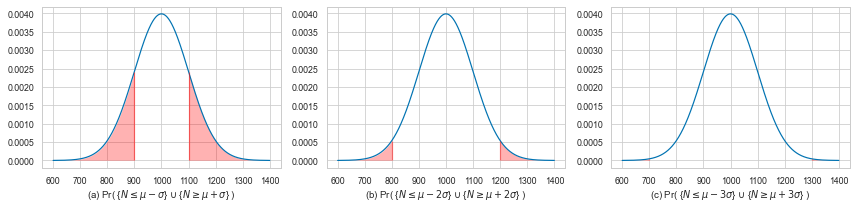

In [99]:
filename = "figures/tails_of_the_distribution_panel.pdf"

from plot_helpers import calc_prob_and_plot_tails


mu = rvN.mean()    # mean of the random variable
sigma = rvN.std()  # standard deviaiton of the random variable


with plt.rc_context({"figure.figsize":(12,3)}):
    fig, axs = plt.subplots(1, 3)
    ax1, ax2, ax3 = axs

    n = 1
    x_l = mu-n*sigma
    x_r = mu+n*sigma
    title1 = "(a) Pr( {$N \leq \mu-\sigma$} $\cup$ {$N \geq \mu+\sigma$} )"
    p2, ax1 = calc_prob_and_plot_tails(rvN, x_l, x_r, xlims=[600, 1400],
                                      ax=ax1, title=title1)

    n = 2
    x_l = mu-n*sigma
    x_r = mu+n*sigma
    title2 = "(b) Pr( {$N \leq \mu-2\sigma$} $\cup$ {$N \geq \mu+2\sigma$} )"
    p2, ax2 = calc_prob_and_plot_tails(rvN, x_l, x_r, xlims=[600, 1400],
                                      ax=ax2, title=title2)

    n = 3
    x_l = mu-n*sigma
    x_r = mu+n*sigma
    title3 = "(c) Pr( {$N \leq \mu-3\sigma$} $\cup$ {$N \geq \mu+3\sigma$} )"
    p3, ax3 = calc_prob_and_plot_tails(rvN, x_l, x_r, xlims=[600, 1400],
                                      ax=ax3, title=title3)

    print(f"{p1=}\n",f"{p2=}\n",f"{p3=}\n", sep="")

    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)


The above calculations leads us to an important rule of thumb: the values of the 5% tail of the distribution are $k=2$ standard deviations away from the mean (more precisely, we should use $k=1.96$ to get exactly 5%). We'll use this facts later in STATS to define a *cutoff value* for events that are unlikely to occur by chance.

# FIGURES GEN

# CUT MATERIAL

#### CUT EXAMPLE PLOT OF PDF (used to be in Calculus section)

<AxesSubplot:>

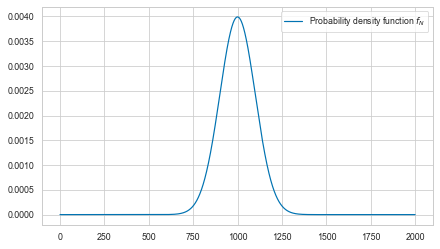

In [101]:
from scipy.stats import norm

# define normally distributed random variable with 𝜇=1000 and 𝜎=100
rvN = norm(1000, 100)

ns = np.linspace(0, 2000, 10000)
fNs = rvN.pdf(ns)
sns.lineplot(x=ns, y=fNs, label="Probability density function $f_N$")

In [102]:
# import matplotlib.pyplot as plt
# filename = "figures/graph_of_pdf_of_rvN.pdf"

# with plt.rc_context({"figure.figsize":(7,3)}):
#     x = np.linspace(0, 2000, 10000)
#     fN = rvN.pdf(x)
#     ax = sns.lineplot(x=x, y=fN)
#     ax.figure.tight_layout()
#     ax.set_title("Probability density function for the distribution $\mathcal{N}(1000,100)$")
#     ax.set_xlabel('$x$')
#     ax.set_ylabel('$f_N(x)$')
#     ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)